In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data=pd.read_csv(r'C:\Users\D\Downloads\titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.drop(["PassengerId",'Ticket'],axis = 1,inplace = True)


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

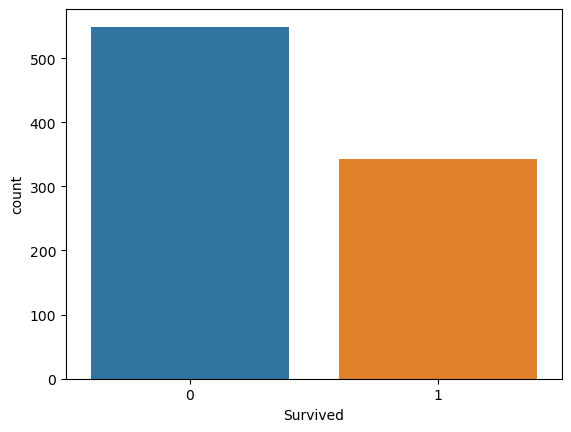

In [7]:
sns.countplot(x='Survived', data=data)

In [8]:
data.groupby(['Survived','Sex'])['Survived'].count()


Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

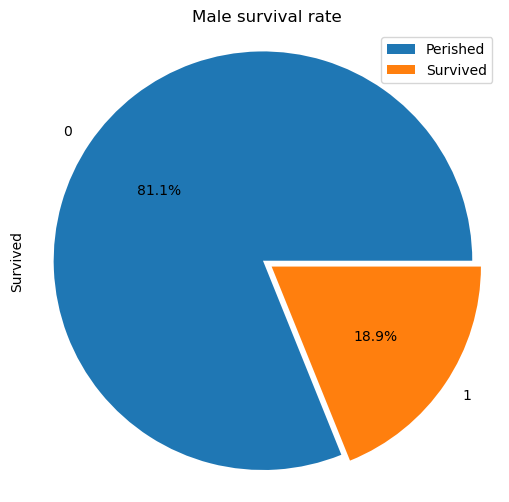

In [9]:
data[data['Sex'] == 'male'].Survived.groupby(data.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Male survival rate")
plt.show()

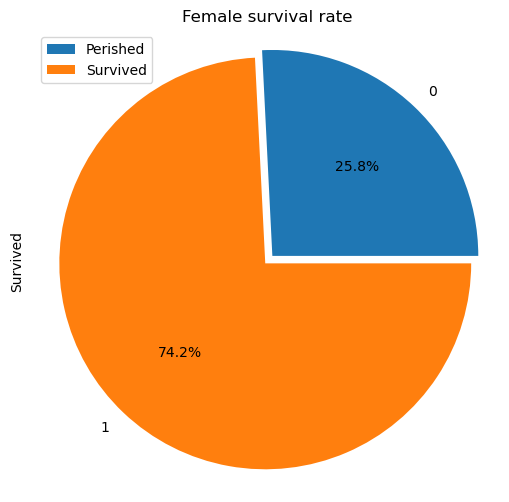

In [10]:
data[data['Sex'] == 'female'].Survived.groupby(data.Survived).count().plot(kind='pie',autopct='%1.1f%%',figsize=(6, 6),explode=[0,0.05])
plt.axis('equal')
plt.title("Female survival rate")
plt.legend(["Perished","Survived"])
plt.show()


In [11]:
#The above 2 plots says the females were given more priority than male in the survival process. That too there is a significant difference between the two.

#So now if we choose just Sex as the only feature and say all females survived and all men perished, then we would end up with an accuracy of 78.67%



In [12]:
pd.crosstab(data.Pclass, data.Survived, margins=True)


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


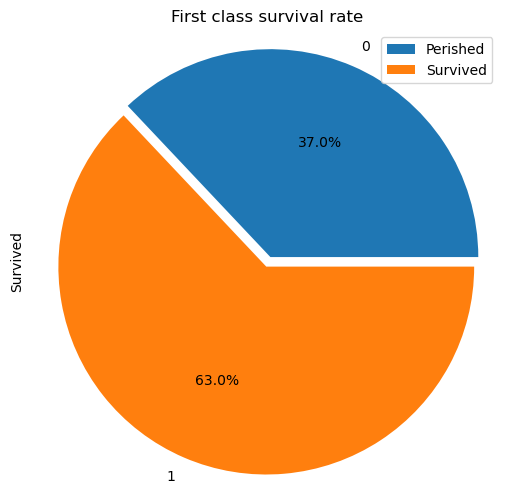

In [13]:
data[data['Pclass'] == 1].Survived.groupby(data .Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("First class survival rate")
plt.show()


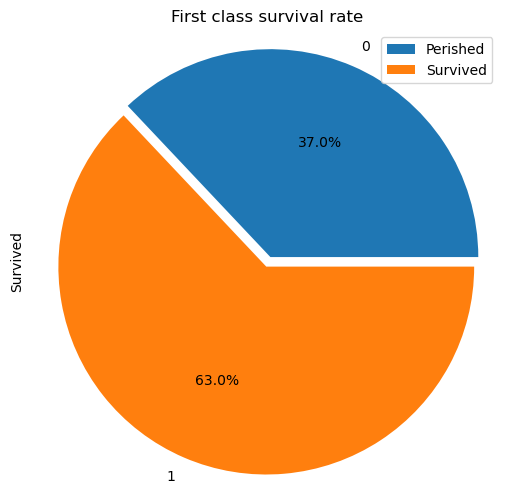

In [14]:
data[data['Pclass'] == 1].Survived.groupby(data.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("First class survival rate")
plt.show()


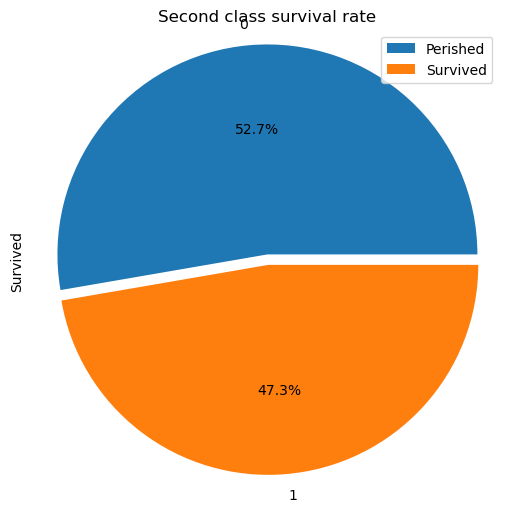

In [15]:
data[data['Pclass'] == 2].Survived.groupby(data.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Second class survival rate")
plt.show()


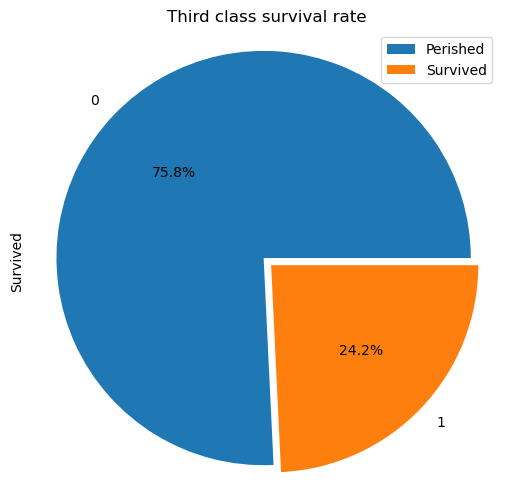

In [16]:
data[data['Pclass'] == 3].Survived.groupby(data.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Third class survival rate")
plt.show()


In [17]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True)


Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

C:\ProgramData\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

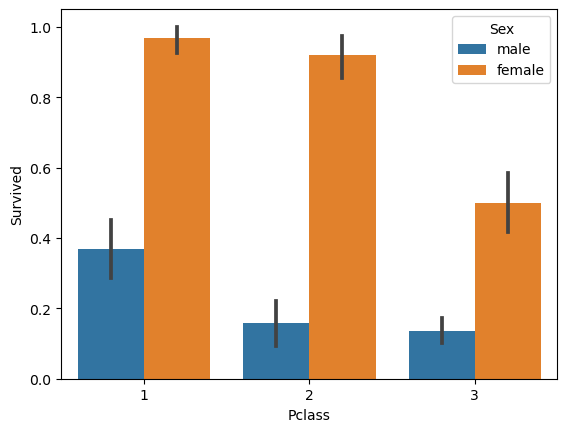

In [18]:
sns.barplot('Pclass','Survived',hue='Sex', data=data)


<AxesSubplot:xlabel='Survived', ylabel='count'>

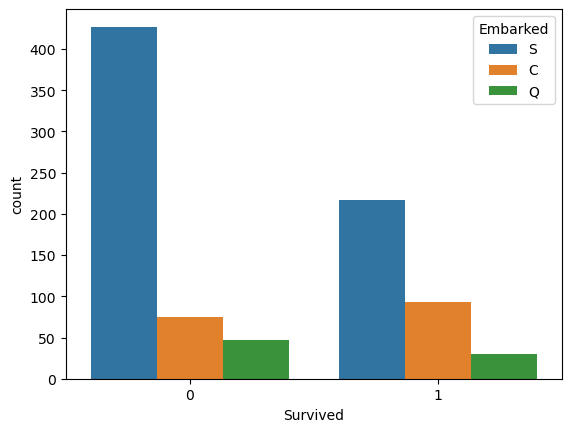

In [19]:
sns.countplot(x='Survived', data=data,hue = 'Embarked')

In [20]:
pd.crosstab([data.Sex, data.Survived], [data.SibSp, data.Pclass], margins=True)


SibSp              0             1          2         3          4  5  8  All
Pclass             1    2    3   1   2   3  1  2   3  1  2   3   3  3  3     
Sex    Survived                                                              
female 0           1    3   33   2   3  21  0  0   3  0  0   7   4  1  3   81
       1          48   41   48  38  25  17  3  3   4  2  1   1   2  0  0  233
male   0          59   67  235  16  20  35  1  4   7  1  0   4  11  4  4  468
       1          29    9   35  15   7  10  1  1   1  0  0   0   1  0  0  109
All              137  120  351  71  55  83  5  8  15  3  1  12  18  5  7  891

In [21]:
#The above crosstab indicates 2 things:

# Most of the passerenges didn'y had siblings onboard and the majority had atmost 1 sibling onboard

# Not much of priority was given to the passengers who had sibelings onboard in the rescue operation



In [22]:
pd.crosstab([data.Sex, data.Survived], [data.Parch, data.Pclass], margins=True)


Parch              0             1           2          3     4     5  6  All
Pclass             1    2    3   1   2   3   1   2   3  2  3  1  3  3  3     
Sex    Survived                                                              
female 0           1    5   35   0   1  13   2   0  17  0  1  0  2  3  1   81
       1          63   40   50  17  17  12  11  11   8  2  1  0  0  1  0  233
male   0          63   81  260  10   7  22   3   3  15  0  1  1  1  1  0  468
       1          36    8   36   4   7   8   5   2   3  0  0  0  0  0  0  109
All              163  134  381  31  32  55  21  16  43  2  3  1  3  5  1  891

In [23]:
data.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

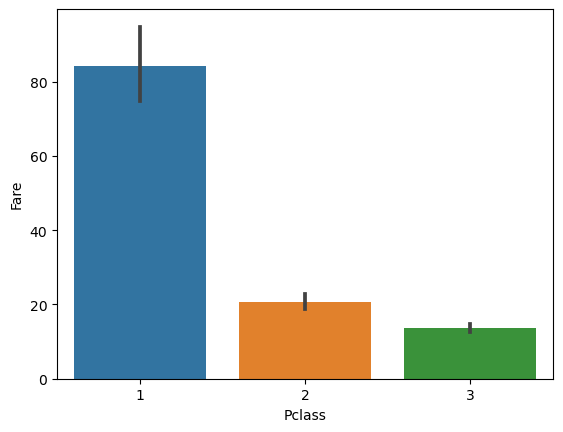

In [24]:
sns.barplot(y = "Fare",x = "Pclass",data = data)



C:\ProgramData\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


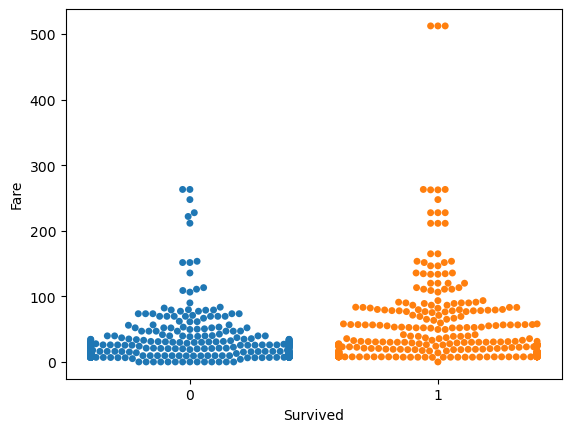

In [25]:
sns.swarmplot(x='Survived', y='Fare', data=data);


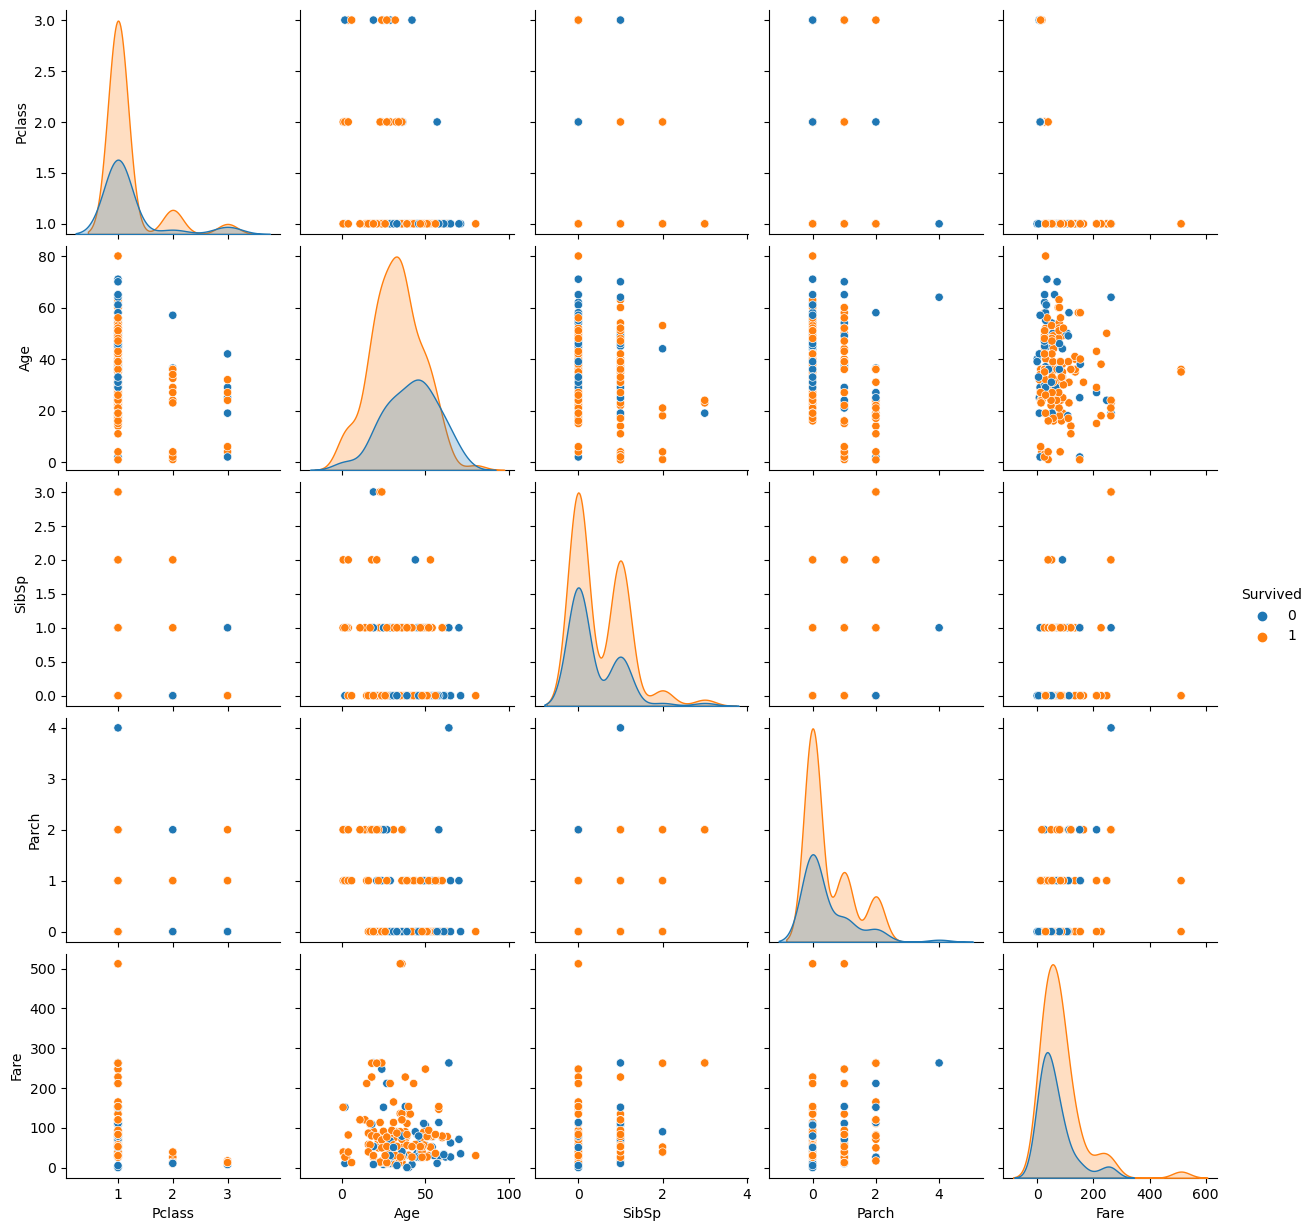

In [26]:
sns.pairplot(data.drop("Name",axis = 1).dropna(),hue = "Survived")


In [27]:
data.groupby('Survived').describe()['Age']


,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


C:\ProgramData\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda\lib\site-p

<AxesSubplot:xlabel='Age', ylabel='Density'>

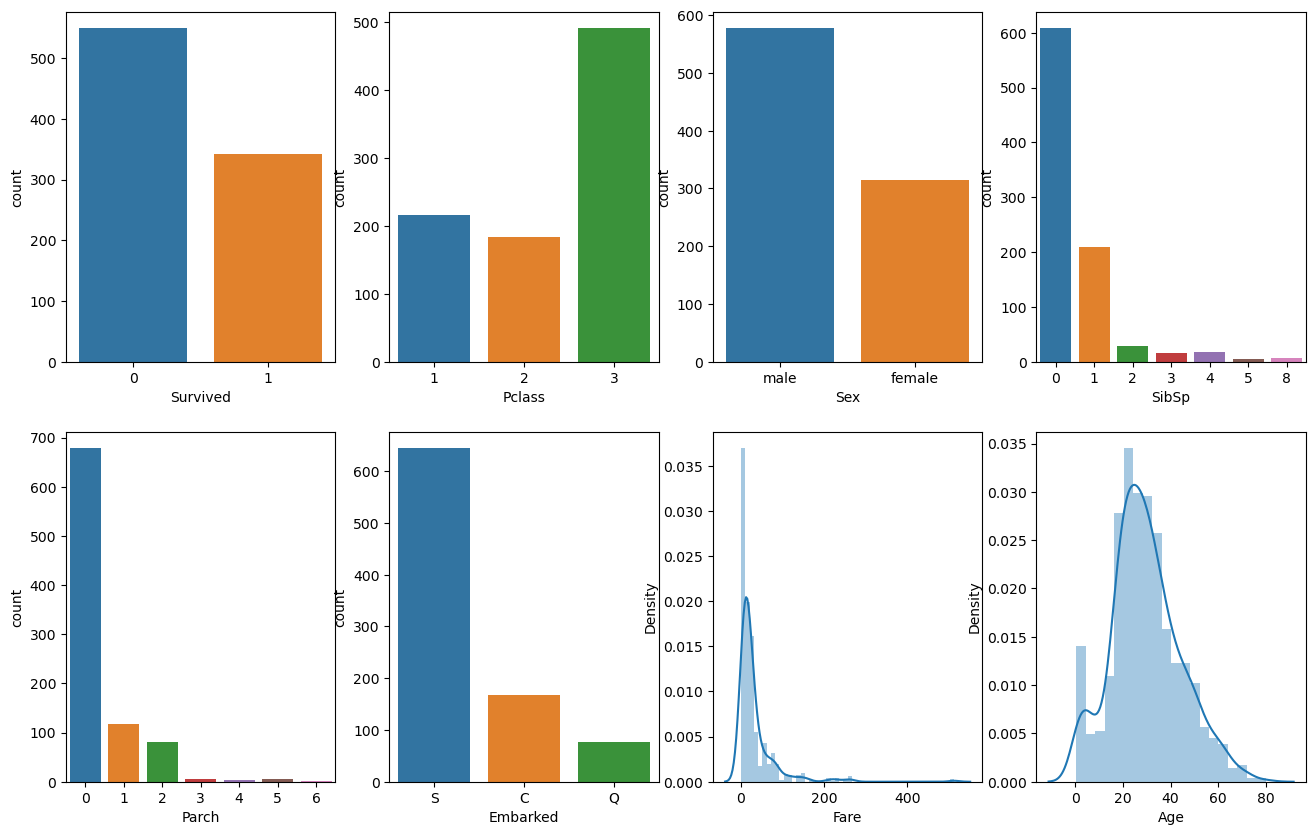

In [28]:
fig , axes = plt.subplots(2, 4, figsize = (16,10) )
sns.countplot('Survived' , data = data, ax = axes[0,0])
sns.countplot('Pclass' , data = data, ax = axes[0,1])
sns.countplot('Sex' , data = data, ax = axes[0,2])
sns.countplot('SibSp' , data = data, ax = axes[0,3])
sns.countplot('Parch' , data = data, ax = axes[1,0])
sns.countplot('Embarked' , data = data, ax = axes[1,1])
sns.distplot(data['Fare'] , kde = True , ax = axes[1,2])
sns.distplot(data['Age'].dropna() , kde = True , ax = axes[1,3])
